# Data-X Fall 2020: Homework 05

### Scikit-Learn

In this assignment, you will do some exercises with prediction and plotting. 

Remember to store results in the variables defined, and don't reuse variables from a previous question.

## Part 1 - Regression


### Data:
__Data Source__:
Data file should be next to your notebook file called : __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1
Let's read the data file in Python.

In [2]:
import pandas as pd
import numpy as np
file_path='./Energy.csv'

data=pd.read_csv(file_path)

## Check top 5 rows of the data
print(data.head(5))

     X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84


__Q 1 a) Describe data features in terms of type, distribution range. Print out the max, min, count and mean values for each column in `data`. Store the result in a new variable called `distribution`.__

<!--
BEGIN QUESTION
name: q1a
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [3]:
distribution = data.describe().loc[["count", "mean", "min", "max"]]
distribution

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.0,768.000000,768.00,768.0,768.000000,768.0000,768.000000
mean,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201
min,0.620000,514.500000,245.0,110.250000,3.50,2.0,0.000000,0.0000,6.010000
max,0.980000,808.500000,416.5,220.500000,7.00,5.0,0.400000,5.0000,43.100000


In [4]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



__Q1 b) Check if there are any NaN/null values. Store a boolean True or False in the variable `any_nulls`.__
<!--
BEGIN QUESTION
name: q1b
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

In [5]:
any_nulls = data.isnull().values.any()
any_nulls

False

In [6]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



__Q1 c) Separate the data into features and output labels.__

Take the columns labelled X1 to X8 and store them in a new variable called `X`. Store the colum Y1 into a new variable called `Y`

<!--
BEGIN QUESTION
name: q1c
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

In [7]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
display(X.head())
display(Y.head())

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

In [8]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



__Q1 d) Plot feature distributions. This step should give you clues about data sufficiency.__

**Note:** This question is not graded, it's intended for your reference only.

Your plotted image should look like this: <img src='./q1_c_expected.png'>

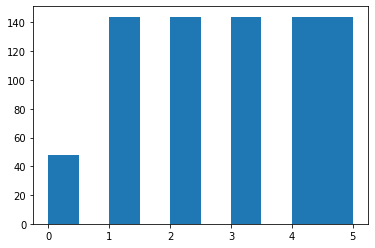

In [9]:
import matplotlib.pyplot as plt

plt.hist(X["X8"]);

## REGRESSION

Labels in the dataset provided are continuous values.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

__Q2 a): Pick 90% of the data for training and the rest for test.__

<!--
BEGIN QUESTION
name: q2a
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

In [10]:
from sklearn.model_selection import train_test_split
random_state = 100 # Dont change this line

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = random_state)

print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 691
Number of samples in validation data: 77


In [11]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



__Q2 b) Train a linear regression model on the training data that you obtained above. What are the intercept and coefficient values of your linear model?.__

<!--
BEGIN QUESTION
name: q2b
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [12]:
from sklearn import linear_model
# Create linear regression object

linearReg_model = linear_model.LinearRegression()
linearReg_model.fit(x_train, y_train)

print ('INTERCEPT:',linearReg_model.intercept_)
print ('COEFFICIENTS:\n',linearReg_model.coef_)

INTERCEPT: 80.21318247105042
COEFFICIENTS:
 [-6.40522214e+01  5.50472542e+11 -5.50472542e+11 -1.10094508e+12
  4.37367821e+00 -6.80479407e-03  1.97600989e+01  2.33606584e-01]


In [13]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed




__Q.2 c): Report model performance using 'MEAN SQUARE' error metric on:__

__1. Data that was used for training(Training error)__   

__2. On the 10 percent of unseen data (Test error)__ 

<!--
BEGIN QUESTION
name: q2c
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [14]:
from sklearn.metrics import mean_squared_error

training_error= mean_squared_error(y_train, linearReg_model.predict(x_train))
print("Training Error (Mean squared error) :",training_error)


test_error= mean_squared_error(y_test, linearReg_model.predict(x_test))
print("Test Error (Mean squared error) :",test_error)

Training Error (Mean squared error) : 8.507811675005833
Test Error (Mean squared error) : 8.671070097547215


In [15]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed




__Q2 d):__ 

Lets us see the effect of amount of data on the performance of prediction model. Use varying amounts of  Training data (100,200,300,400,500,600,all) to train regression models and report  training error and validation error in each case.

**Plot error rates vs number of training examples.** Both the training error and the validation error should be plotted. Comment on the relationship you observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

<!--
BEGIN QUESTION
name: q2d
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

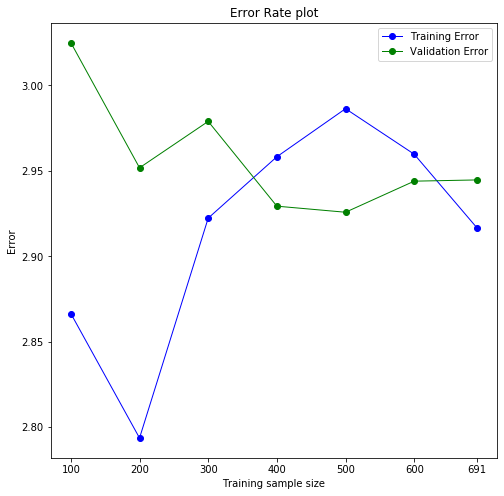

In [16]:
from sklearn.utils import shuffle

sample_numbers= np.append(np.arange(100, 700, 100), (len(x_train)))

trainset_errors = list()
validset_errors = list()

model_linear= linear_model.LinearRegression()

for i in sample_numbers:
    x_train_sample = x_train.iloc[:i, :]
    y_train_sample = y_train.iloc[:i]
    model_linear.fit(x_train_sample, y_train_sample)
    train_error_sample = np.sqrt(mean_squared_error(y_train_sample, model_linear.predict(x_train_sample)))
    valid_error_sample = np.sqrt(mean_squared_error(y_test, model_linear.predict(x_test)))
    trainset_errors.append(train_error_sample)
    validset_errors.append(valid_error_sample)
    
# PLOT ERROR RATE:
plt.figure(figsize=(8, 8))

plt.plot(sample_numbers,trainset_errors,color="blue", linewidth=1.0, linestyle="-",marker='o',label='Training Error')
plt.plot(sample_numbers,validset_errors,color="green", linewidth=1.0, linestyle="-",marker='o',label='Validation Error' )


plt.xticks(sample_numbers)
plt.legend(loc='upper right')
plt.xlabel('Training sample size')
plt.ylabel('Error')
plt.title("Error Rate plot")

plt.show()

As the training sample size increases, the model becomes a better predictor, thus decreasing validation error.

## Part 2 - Classification


__CLASSIFICATION__:

Labels are discrete values in classification tasks.

Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__Q 3 a):  Bucket values of `Y1` i.e `Heating Load`  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-29),   
2: 'High'  (>29)

This converts the given dataset  into a classification problem, the classes being: Heating load is: *low, medium or high*. Use this datset with the transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.9 : 0.1.  

*Report training and test accuracies in  confusion matrices.*

In [18]:
import math

Y_clas = []

for i in Y:
    if i < 15:
        Y_clas.append("Low")
    elif i > 29:
        Y_clas.append("High")
    else:
        Y_clas.append("Medium")

Y_clas = pd.Series(Y_clas)
Y_clas.value_counts()

Low       285
Medium    243
High      240
dtype: int64

In the cell below, split the dataset into training and test and fit a logistic regression model to the training data.
Your training as well as test accuracy should be at least 70%. Make sure your test size is 10% of the dataset and your hyperparameter `C` for logistic regression is 0.001 (i.e 1e-3)
<!--
BEGIN QUESTION
name: q3a2
manual: true
points: 1
-->
<!-- EXPORT TO PDF -->

In [20]:
from sklearn import linear_model

random_state=100 # Use this random state in your model
C = 0.001
test_size= 0.1

xx1_train, xx1_test, yy1_train, yy1_test = train_test_split(X, Y_clas, test_size=test_size, random_state=random_state)

print ('Number of samples in training data:',len(xx1_train))
print ('Number of samples in validation data:',len(xx1_test))

# Name our regression object
logreg_model = linear_model.LogisticRegression(C=C)
# we create an instance of Neighbours Classifier and fit the data.

print ('Training a logistic Regression Model..')
logreg_model.fit(xx1_train, yy1_train)

Number of samples in training data: 691
Number of samples in validation data: 77
Training a logistic Regression Model..


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [21]:
ok.grade("q3a2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below, calculate the training and test accuracies.
<!--
BEGIN QUESTION
name: q3a3
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [22]:
#Report training and test accuracy
training_accuracy= logreg_model.score(xx1_train, yy1_train)
print ('Training Accuracy:',training_accuracy)


test_accuracy= logreg_model.score(xx1_test, yy1_test)
print ('Testing Accuracy:',test_accuracy)

Training Accuracy: 0.7120115774240231
Testing Accuracy: 0.6493506493506493


In [23]:
ok.grade("q3a3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below, calculate the confusion matrix
<!--
BEGIN QUESTION
name: q3a4
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [24]:
# Calculate and report Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred = logreg_model.predict(xx1_train)
y_test_pred = logreg_model.predict(xx1_test)

train_confusion_matrix = confusion_matrix(yy1_train, y_train_pred)
test_confusion_matrix = confusion_matrix(yy1_test, y_test_pred)

print('Training Confusion Matrix \n', train_confusion_matrix)
print('Test Confusion Matrix \n', test_confusion_matrix)

Training Confusion Matrix 
 [[183   0  37]
 [  0 222  36]
 [ 60  66  87]]
Test Confusion Matrix 
 [[15  0  5]
 [ 0 23  4]
 [ 9  9 12]]


In [25]:
ok.grade("q3a4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



__Q3 b):__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

Refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
More at: https://en.wikipedia.org/wiki/Feature_scaling

<!--
BEGIN QUESTION
name: q3b1
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

In [26]:
from sklearn.preprocessing import MinMaxScaler
# NORMALIZE
def normalize(col):
    col_ = MinMaxScaler().fit_transform(col)
    return col_

for col in ['X1','X2','X3','X4','X5','X6','X7','X8']:
    X[col]=normalize(X[[col]])

X1=X
X1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
ok.grade("q3b1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below, split the dataset into training and test and fit a logistic regression model to the training data.
Once fitted, store the test and train accuracies in the `training_accuracy` and `test_accuracy` variables
<!--
BEGIN QUESTION
name: q3b2
manual: true
points: 4
-->
<!-- EXPORT TO PDF -->

In [28]:
## Split the train and testing data
random_state=100 # don't change these lines
test_size=0.1 # don't change these lines

xx1_train, xx1_test, yy1_train, yy1_test = train_test_split(X1, Y_clas, test_size=test_size, random_state=random_state)

print ('Number of samples in training data:',len(xx1_train))
print ('Number of samples in validation data:',len(xx1_test))

# Name our LOGISTIC regression object
logreg_model = linear_model.LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.

print ('Training a logistic Regression Model..')
logreg_model.fit(xx1_train, yy1_train)

training_accuracy= logreg_model.score(xx1_train, yy1_train)
print ('Training Accuracy:', training_accuracy)


test_accuracy= logreg_model.score(xx1_test, yy1_test)
print ('Testing Accuracy:', test_accuracy)

Number of samples in training data: 691
Number of samples in validation data: 77
Training a logistic Regression Model..


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8364688856729378
Testing Accuracy: 0.922077922077922


In [29]:
ok.grade("q3b2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



## End
Congratulations on finishing the homework! Remember to select Kernel -> Restart and Run all before submitting your `.ipynb`.